In [4]:
import pandas as pd
import IPython 
from IPython.display import display

# Read in the data

df = pd.read_csv(r"C:\Users\maxdo\OneDrive\Рабочий стол\new advanced project dataset\data\raw\Population Growth.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

display(df)

,Year,Population Growth Rate,Growth Rate
0,1950,"2,499,322,157",0.00%
1,1951,"2,543,130,380",1.75%
2,1952,"2,590,270,899",1.85%
3,1953,"2,640,278,797",1.93%
4,1954,"2,691,979,339",1.96%
5,1955,"2,746,072,141",2.01%
6,1956,"2,801,002,631",2.00%
7,1957,"2,857,866,857",2.03%
8,1958,"2,916,108,097",2.04%
9,1959,"2,970,292,188",1.86%


In [10]:
summary_stats = df.describe()
print(summary_stats)







              Year
count    74.000000
mean   1986.500000
std      21.505813
min    1950.000000
25%    1968.250000
50%    1986.500000
75%    2004.750000
max    2023.000000


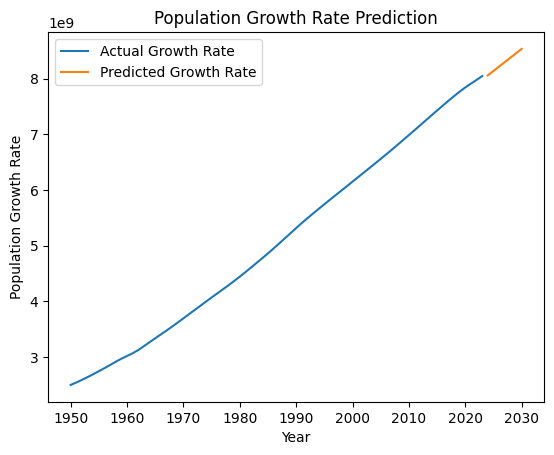

        Year  Population Growth Rate
0 2024-01-01            8.057781e+09
1 2025-01-01            8.137097e+09
2 2026-01-01            8.216196e+09
3 2027-01-01            8.295295e+09
4 2028-01-01            8.374394e+09
5 2029-01-01            8.453710e+09
6 2030-01-01            8.532808e+09


In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

df['Year'] = pd.to_datetime(df['Year'], format='%Y')

X = df['Year'].astype(np.int64).values.reshape(-1, 1)
y = df['Population Growth Rate'].str.rstrip('%').astype(float)

model = LinearRegression()
model.fit(X, y)

future_years = pd.date_range(start='2024-01-01', end='2030-01-01', freq='AS')
future_X = future_years.astype(np.int64).values.reshape(-1, 1)
predicted_growth_rate = model.predict(future_X)

predictions = pd.DataFrame({'Year': future_years, 'Population Growth Rate': predicted_growth_rate})

plt.plot(df['Year'], y, label='Actual Growth Rate')
plt.plot(predictions['Year'], predictions['Population Growth Rate'], label='Predicted Growth Rate')
plt.xlabel('Year')
plt.ylabel('Population Growth Rate')
plt.title('Population Growth Rate Prediction')
plt.legend()
plt.show()

print(predictions)

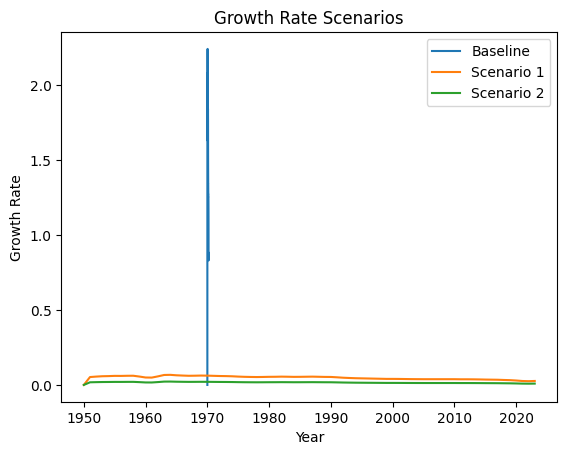

In [24]:
# Define scenario and modify growth rate
scenario1_growth_rate = 3.0
scenario2_growth_rate = 1.0

df_scenario1 = df.copy()
df_scenario1['Growth Rate'] = df['Growth Rate'].str.rstrip('%').astype(float) * (scenario1_growth_rate / 100)

df_scenario2 = df.copy()
df_scenario2['Growth Rate'] = df['Growth Rate'].str.rstrip('%').astype(float) * (scenario2_growth_rate / 100)

# Compare the scenarios to the actual data
baseline_growth_rates = df['Growth Rate'].str.rstrip('%').astype(float)

# Plot the baseline scenario
years = df['Year']

plt.plot(baseline_growth_rates, label='Baseline')
plt.plot(years, df_scenario1['Growth Rate'], label='Scenario 1')
plt.plot(years, df_scenario2['Growth Rate'], label='Scenario 2')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.title('Growth Rate Scenarios')
plt.legend()
plt.show()
